In [1]:
%matplotlib inline


In [2]:
from IPython.display import SVG

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


Step 1.1: Load training data

In [3]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape =', x_train.shape)
print('y_train shape =', y_train.shape)

x_train shape = (60000, 28, 28)
y_train shape = (60000,)


Step 1.2: visualize training data if possible

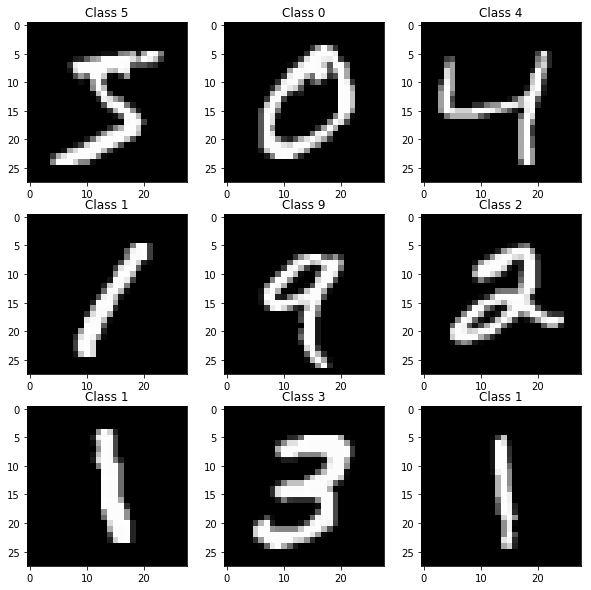

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

Step 1.3: Reformat, Flatten and Scale the Training Data

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Step 2.1 Build Neural Network

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

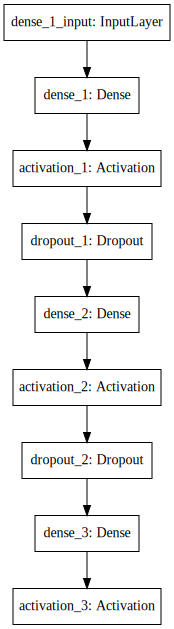

In [8]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Step 2.2 Compile Model

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mae', 'acc'])

Step 2.3 Train Model

In [12]:
model.fit(x_train, y_train,
          batch_size=128, epochs=4,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 13s - loss: 0.1003 - mean_absolute_error: 0.0100 - acc: 0.9691 - val_loss: 0.0839 - val_mean_absolute_error: 0.0081 - val_acc: 0.9728
Epoch 2/4
60000/60000 [==============================] - 14s - loss: 0.0709 - mean_absolute_error: 0.0072 - acc: 0.9776 - val_loss: 0.0669 - val_mean_absolute_error: 0.0066 - val_acc: 0.9782
Epoch 3/4
60000/60000 [==============================] - 14s - loss: 0.0561 - mean_absolute_error: 0.0056 - acc: 0.9822 - val_loss: 0.0747 - val_mean_absolute_error: 0.0064 - val_acc: 0.9769
Epoch 4/4
60000/60000 [==============================] - 14s - loss: 0.0459 - mean_absolute_error: 0.0047 - acc: 0.9854 - val_loss: 0.0680 - val_mean_absolute_error: 0.0053 - val_acc: 0.9801


In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy = {:0.2f} %'.format(score[2]*100))

Test Accuracy = 98.01 %
